In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'..\data\netflix_titles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
df.sample(25)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1750,s1751,TV Show,Dawson's Creek,NaN,"James Van Der Beek, Katie Holmes, Michelle Wil...",United States,"November 1, 2020",2002,TV-14,6 Seasons,"Romantic TV Shows, TV Dramas, Teen TV Shows",This nighttime soap about a group of close-kni...
1633,s1634,Movie,The 2nd,Brian Skiba,"Ryan Phillippe, Casper Van Dien, Jack Griffo, ...",United States,"November 30, 2020",2020,TV-MA,93 min,Action & Adventure,A Secret Service agent is drawn into a terrori...
2848,s2849,Movie,Luccas Neto in: The End of Christmas,Lucas Margutti,"Luccas Neto, Giovanna Alparone, Cleber Salgado...",Brazil,"March 3, 2020",2019,TV-Y,71 min,"Children & Family Movies, Comedies, Music & Mu...","To save Christmas, Luccas and Gi head to the N..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
1545,s1546,TV Show,Pup Academy,NaN,"Christian Convery, Don Lake, Chance Hurstfield...",United States,"December 15, 2020",2020,TV-Y,2 Seasons,"Kids' TV, TV Comedies",Furry friends take a re-bark-able journey in t...
2425,s2426,Movie,The Light of My Eyes,NaN,NaN,NaN,"June 5, 2020",2010,TV-MA,96 min,"Dramas, International Movies, Romantic Movies",A composer hides his love for his formerly bli...
7194,s7195,Movie,Kid Kulafu,Paul Soriano,"Robert Villar, Alessandra de Rossi, Cesar Mont...",Philippines,"March 4, 2019",2015,TV-14,108 min,"Dramas, International Movies, Sports Movies","Growing up in poverty and political turmoil, h..."
735,s736,Movie,Sarbath,Prabhakaran,"Kathir, Soori, Rahasya Gorak, Ashvatt",India,"June 11, 2021",2021,TV-PG,113 min,"Comedies, Dramas, International Movies",When a city man returns to his native village ...
1558,s1559,Movie,Giving Voice,"James D. Stern, Fernando Villena","Viola Davis, Denzel Washington, Stephen Hender...",United States,"December 11, 2020",2020,PG-13,91 min,Documentaries,Six ambitious student actors audition for the ...
3090,s3091,Movie,Blitz Patrollie,Andrew Wessels,"Joey Rasdien, David Kau, David Kibuuka, Chris ...",South Africa,"December 27, 2019",2013,TV-MA,102 min,"Action & Adventure, Comedies, International Mo...",Caught between family pressures and small-time...


In [7]:
df['country'].replace(np.NaN, '', inplace=True)

In [8]:
df_movies = df[df['type'] == 'Movie']
df_series = df[df['type'] == 'TV Show']

In [9]:
def split_and_sum_uinique(df, df_col_name: str):
    dct = {}
    for val in df:
        if ',' in val:
            l = val.replace(' ,', ',').replace(', ', ',').split(',')
            for v in l:
                if v in dct:
                    dct[v] = dct[v] + 1
                else:
                    dct[v] = 1
        else:
            if val in dct:
                dct[val] = dct[val] + 1
            else:
                dct[val] = 1
    d = {df_col_name: [*dct], 'Count': [dct[key] for key in dct]}
    data = pd.DataFrame(data=d)
    return data

df_countries = split_and_sum_uinique(df['country'], 'Countries')
df_countries.drop(df_countries[df_countries.Countries==''].index ,inplace=True)
df_countries

,Countries,Count
0,United States,3690
1,South Africa,62
3,India,1046
4,Ghana,5
5,Burkina Faso,1
...,...,...
118,Sudan,1
119,Panama,1
120,Uganda,1
121,East Germany,1


In [10]:
df_genres_movies = split_and_sum_uinique(df_movies['listed_in'], 'Genre')
df_genres_movies

,Genre,Count
0,Documentaries,869
1,Children & Family Movies,641
2,Dramas,2427
3,Independent Movies,756
4,International Movies,2752
5,Comedies,1674
6,Thrillers,577
7,Romantic Movies,616
8,Music & Musicals,375
9,Horror Movies,357


In [11]:
df_genres_series = split_and_sum_uinique(df_series['listed_in'], 'Genre')
df_genres_series

,Genre,Count
0,International TV Shows,1351
1,TV Dramas,763
2,TV Mysteries,98
3,Crime TV Shows,470
4,TV Action & Adventure,168
5,Docuseries,395
6,Reality TV,255
7,Romantic TV Shows,370
8,TV Comedies,581
9,TV Horror,75


In [12]:
import pycountry

input_countries = df_countries['Countries'].tolist()

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

df_countries = df_countries.assign(iso_alpha=codes)

df_countries.head()

,Countries,Count,iso_alpha
0,United States,3690,USA
1,South Africa,62,ZAF
3,India,1046,IND
4,Ghana,5,GHA
5,Burkina Faso,1,BFA


In [13]:
df['duration'] = df['duration'].str.replace('[^0-9]', '')
df['duration'].sample(15)

C:\Users\Maciek\AppData\Local\Temp\ipykernel_288\4065173090.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['duration'] = df['duration'].str.replace('[^0-9]', '')


7180     67
2633    105
428      87
610     121
2264    151
374      94
656     105
2809     93
1584     97
3623     59
1164     97
7325      1
4196      1
5185      1
816     128
Name: duration, dtype: object

In [14]:
df.loc[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [15]:
df.drop([5541, 5794, 5813], axis=0, inplace=True)

In [16]:
df['duration'] = df['duration'].astype('int')
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int32
listed_in       object
description     object
dtype: object

In [17]:
from collections import defaultdict

counter = defaultdict(int)

for val in df['date_added']:
    if isinstance(val, str):
        month = val.split()[2]
        counter[month] += 1
    else: continue

counter

defaultdict(int,
            {'2021': 1498,
             '2020': 1879,
             '2019': 2016,
             '2018': 1649,
             '2017': 1187,
             '2016': 427,
             '2015': 82,
             '2014': 24,
             '2013': 11,
             '2012': 3,
             '2011': 13,
             '2009': 2,
             '2008': 2,
             '2010': 1})

In [18]:
df.shape

(8804, 12)

In [19]:
month = []
for date in df['date_added']:
    if isinstance(date, str):
        y = date.split()[2]
        month.append(int(y))
    else:
        month.append(0)

df['year_added'] = month
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
5347,s5348,TV Show,Bountiful Blessings,NaN,"Jessica Hsuan, Tay Ping Hui, Thomas Ong, Jeffr...",Singapore,"August 1, 2017",2011,TV-14,1,"International TV Shows, TV Dramas, TV Sci-Fi &...",A former mortal who is now the Kitchen God coo...,2017
1659,s1660,Movie,Hard Kill,Matt Eskandari,"Jesse Metcalfe, Bruce Willis, Natalie Eva Mari...",United States,"November 23, 2020",2020,R,98,Action & Adventure,When a billionaire hires a team of mercenaries...,2020
8334,s8335,TV Show,The Great Train Robbery,NaN,"Luke Evans, Jim Broadbent, Paul Anderson, Mart...",United Kingdom,"March 31, 2017",2013,NR,1,"British TV Shows, Crime TV Shows, Internationa...",This two-part tale delivers the true story of ...,2017
1099,s1100,Movie,The Fisherman's Diary,Enah Johnscott,"Kang Quintus, Faith Fidel, Casson Chinepoh, Ra...",Cameroon,"April 4, 2021",2020,TV-MA,143,"Dramas, International Movies",Inspired by Nobel Peace Prize winner Malala Yo...,2021
2605,s2606,Movie,Ekşi Elmalar,Yılmaz Erdoğan,"Yılmaz Erdoğan, Farah Zeynep Abdullah, Songül ...",Turkey,"April 29, 2020",2016,TV-PG,109,"Dramas, International Movies","In an eastern Turkish town, suitors knock on t...",2020
7776,s7777,Movie,Power Rangers Samurai: Party Monsters (Hallowe...,NaN,"Alex Heartman, Erika Fong, Hector David Jr., N...",United States,"January 1, 2016",2011,TV-Y7,24,Movies,"On Halloween night, the creepiest creatures fr...",2016
174,s175,Movie,Tears of the Sun,Antoine Fuqua,"Bruce Willis, Monica Bellucci, Cole Hauser, Ea...",United States,"September 1, 2021",2003,R,121,"Action & Adventure, Dramas",A Navy SEAL is sent to a war-torn African jung...,2021
487,s488,TV Show,The Cook of Castamar,NaN,"Michelle Jenner, Roberto Enríquez, Hugo Silva,...",,"July 9, 2021",2021,TV-MA,1,"International TV Shows, Romantic TV Shows, Spa...","In 1720 Madrid, a talented cook catches the ey...",2021
3499,s3500,TV Show,Vagabond,NaN,"Lee Seung-gi, Bae Suzy, Shin Sung-rok, Moon Ju...",South Korea,"September 21, 2019",2019,TV-MA,1,"International TV Shows, Korean TV Shows, TV Ac...","When his nephew dies in a plane crash, stunt m...",2019
1199,s1200,Movie,Savages,Oliver Stone,"Taylor Kitsch, Aaron Taylor-Johnson, Blake Liv...",United States,"March 16, 2021",2012,R,131,"Dramas, Thrillers","With the help of a shady DEA agent, two weed e...",2021


In [20]:
month = []
for date in df['date_added']:
    if isinstance(date, str):
        y = date.split()[0]
        month.append(y)
    else:
        month.append(0)

df['month_added'] = month
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
5236,s5237,TV Show,Beyblade Burst,NaN,"Marina Inoue, Junya Enoki, Fumihiro Okabayashi...",Japan,"October 1, 2017",2016,TV-Y7,1,"Anime Series, Kids' TV","Middle schooler Valt Aoi, with his Beyblade Va...",2017,October
5535,s5536,Movie,Kevin Hart: What Now?,Leslie Small,"Kevin Hart, Don Cheadle, Halle Berry, Ed Helms...",United States,"April 11, 2017",2016,R,96,Stand-Up Comedy,Frenetic comic Kevin Hart hits Philadelphia an...,2017,April
3642,s3643,TV Show,Another Life,NaN,"Katee Sackhoff, Justin Chatwin, Samuel Anderso...",United States,"July 25, 2019",2019,TV-MA,1,"British TV Shows, International TV Shows, TV A...","After a massive alien artifact lands on Earth,...",2019,July
4618,s4619,Movie,Animal World,Han Yan,"Li Yi Feng, Zhou Dongyu, Michael Douglas, Bing...",China,"September 28, 2018",2018,TV-MA,130,"Action & Adventure, International Movies, Sci-...","An unlucky, debt-ridden teen resorts to his ma...",2018,September
1524,s1525,Movie,Braven,Lin Oeding,"Jason Momoa, Garret Dillahunt, Jill Wagner, St...",Canada,"December 17, 2020",2018,R,94,Action & Adventure,A logger defends himself and his family from a...,2020,December
3314,s3315,Movie,100 Things to do Before High School,NaN,"Isabela Moner, Jaheem Toombs, Owen Joyner, Jac...",United States,"November 2, 2019",2014,TV-Y,44,Movies,"Led by seventh-grader C.J., three students who...",2019,November
862,s863,TV Show,Special,NaN,"Ryan O'Connell, Jessica Hecht, Punam Patel, Ma...",United States,"May 20, 2021",2021,TV-MA,2,TV Comedies,A young gay man with cerebral palsy branches o...,2021,May
6952,s6953,Movie,Hedgehogs,Huang Jianming,"Anthony Padilla, Ian Hecox, Jenn McAllister, J...","United States, China","April 1, 2019",2016,PG,94,Children & Family Movies,When a hedgehog suffering from memory loss for...,2019,April
2687,s2688,Movie,New Money,Tope Oshin,"Jemima Osunde, Blossom Chukwujekwu, Kate Hensh...",Nigeria,"April 14, 2020",2018,TV-14,107,"Dramas, International Movies",An aspiring fashion designer's life is transfo...,2020,April
3152,s3153,Movie,My Wife and I,Bunmi Ajakaiye,"Ramsey Nouah, Omoni Oboli, Dorcas Shola Fapson...",South Africa,"December 13, 2019",2017,TV-MA,100,"Comedies, International Movies, Romantic Movies",When a couple leaning toward divorce meets wit...,2019,December


In [21]:
df.loc[df['month_added'] == 0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",0,0
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...,0,0
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,0,0
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,0,0
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",0,0
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,,NaN,2010,TV-Y,2,Kids' TV,A wacky rabbit and his gang of animal pals hav...,0,0
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",0,0
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",0,0
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",0,0
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",0,0


In [22]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)
df.sort_values(by=['month_added', 'year_added'], inplace=True)

In [23]:
df.sample(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1049,s1050,TV Show,Ricky Zoom,NaN,"Max Fincham, Twinkle Jaiswal, Bradley Bissett,...","China, United Kingdom","April 15, 2021",2019,TV-Y,1,"British TV Shows, Kids' TV",Race along with Ricky Zoom and his loyal Bike ...,2021,April
5795,s5796,Movie,The White Helmets,Orlando von Einsiedel,NaN,United Kingdom,"September 16, 2016",2016,TV-PG,41,Documentaries,As daily airstrikes pound civilian targets in ...,2016,September
4486,s4487,Movie,How to Get Over a Breakup,"Joanna Lombardi, Bruno Ascenzo","Gisela Ponce de León, Karina Jordán, Jely Reát...",Peru,"October 20, 2018",2018,TV-MA,104,"Comedies, International Movies, Romantic Movies","A heartbroken ad copywriter living in Lima, Pe...",2018,October
817,s818,Movie,The Meddler,Lorene Scafaria,"Susan Sarandon, Rose Byrne, J.K. Simmons, Ceci...",United States,"June 2, 2021",2015,PG-13,104,"Comedies, Dramas, Independent Movies",Still-grieving widow Marnie moves to Los Angel...,2021,June
3959,s3960,Movie,Mercy Black,Owen Egerton,"Daniella Pineda, Elle LaMont, Janeane Garofalo...",United States,"March 31, 2019",2019,TV-14,88,Horror Movies,"Fifteen years after a traumatic crime, a woman...",2019,March
8102,s8103,TV Show,Strawberry Shortcake: Berry Bitty Adventures,NaN,"Anna Cummer, Janyse Jaud, Andrea Libman, Britt...","France, United States, Canada","January 1, 2016",2015,TV-Y,1,Kids' TV,Join Strawberry Shortcake and her berry best f...,2016,January
962,s963,Movie,The Strangers: Prey at Night,Johannes Roberts,"Bailee Madison, Martin Henderson, Emma Bellomy...","United States, United Kingdom","April 30, 2021",2018,R,85,Horror Movies,Home-invasion horror comes to the trailer park...,2021,April
8083,s8084,TV Show,Star-Crossed,NaN,"Aimee Teegarden, Matt Lanter, Grey Damon, Male...",United States,"April 16, 2015",2014,TV-14,1,"Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy",The passionate love between an alien boy and a...,2015,April
652,s653,Movie,Osuofia in London II,Kingsley Ogoro,"Nkem Owoh, Mara Derwent, Francis Odega, Cynthi...",,"June 22, 2021",2004,TV-14,70,"Comedies, Dramas, International Movies","After collecting his brother's inheritance, Os...",2021,June
6562,s6563,Movie,Dante's Peak,Roger Donaldson,"Pierce Brosnan, Linda Hamilton, Elizabeth Hoff...",United States,"September 1, 2019",1997,PG-13,108,Action & Adventure,When a volcanologist comes to investigate the ...,2019,September


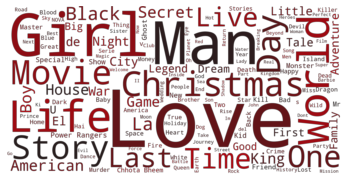

In [25]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wordcloud = WordCloud(background_color='rgba(0, 0, 0, 0)', mode='RGBA', width=2000, height=1000, colormap=cmap,
                          max_words=150).generate(text)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('wordcloud.png', transparent=True)
img = Image.open('wordcloud.png')

In [26]:
df_countries.to_csv(r'..\data\netflix-countries.csv', sep=',', index=False)
df.to_csv(r'..\data\netflix.csv', sep=',', index=False)
df_genres_movies.to_csv(r'..\data\netflix-genres-m.csv', sep=',', index=False)
df_genres_series.to_csv(r'..\data\netflix-genres-s.csv', sep=',', index=False)